This notebook will demonstrate how to use the sklearn CountVectorizer

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
# download the necessary nltk documents that will be required
nltk.download("wordnet")
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/kgyasi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/kgyasi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kgyasi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/kgyasi/nltk_data...


True

In [3]:
# download the BBC news dataset
!wget -nc  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-07-23 18:16:59--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M   581KB/s    in 11s     

2023-07-23 18:17:13 (453 KB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [4]:
# load the bbc news datase with pandas
bbc = pd.read_csv("bbc_text_cls.csv", encoding= "utf-8")

In [5]:
#previw the dataset
bbc.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
# Get the inputs and labels 
inputs = bbc.text
labels = bbc.labels

<AxesSubplot:>

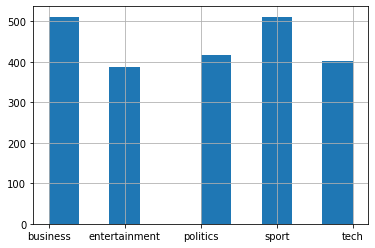

In [7]:
#Plot a histogram to check the distribution of the labels
labels.hist()

## Train_test_split

In [10]:
input_train, input_test, y_train, y_test = train_test_split(inputs, labels, test_size = 0.2, random_state = 42)

In [12]:
# Create word to index mapping using the CountVectorizer class

#with default parameters

vectorizer = CountVectorizer()
#fit to train set
vectorizer.fit(input_train)

CountVectorizer()

In [14]:
x_train = vectorizer.transform(input_train)
x_test = vectorizer.transform(input_test)

Remember that the result is a sparse matrix

In [15]:
x_train

<1780x26762 sparse matrix of type '<class 'numpy.int64'>'
	with 358989 stored elements in Compressed Sparse Row format>

In [18]:
#use can convert to numpy array using  the to_array
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [22]:
# check the percentage of the sparse matrix which are non-zeros
(x_train != 0).sum() / np.prod(x_train.shape)

0.007536029201223603

### Model

In [23]:
model = MultinomialNB()

In [24]:
model.fit(x_train, y_train)

MultinomialNB()

In [29]:
# check model performance on training and test sets
print(f'Train Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}')

Train Score: 0.9943820224719101
Test Score: 0.9730337078651685


Lrt repeat the procedure above with different variation using stop words, lematization, stemming, simple white space split

In [30]:
# with stop words 

vectorizer = CountVectorizer(stop_words= 'english')
#fit to train set
vectorizer.fit(input_train)
x_train = vectorizer.transform(input_train)
x_test = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(x_train, y_train)
# check model performance on training and test sets
print(f'Train Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}')

Train Score: 0.9960674157303371
Test Score: 0.9730337078651685


In [32]:
def get_wordnet_pos(treebank_tag):
    """
    Map Penn Treebank POS tag to WordNet POS tag for lemmatization.
    
    Parameters:
        treebank_tag (str): The Penn Treebank POS tag.
        
    Returns:
        str: The WordNet POS tag.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

class LemmaTokenizer:
    """
    Tokenize and lemmatize a text document using NLTK.
    
    This class provides a custom tokenizer that tokenizes the input text
    document and then lemmatizes the tokens using WordNetLemmatizer from NLTK.
    The Part-of-Speech tags are used to guide the lemmatization process.
    """
    
    def __init__(self):
        """
        Initialize the LemmaTokenizer.
        
        This constructor initializes the WordNetLemmatizer used for lemmatization.
        """
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        """
        Tokenize and lemmatize the input document.
        
        Parameters:
            doc (str): The text document to tokenize and lemmatize.
            
        Returns:
            list: The list of lemmatized tokens.
        """
        # Tokenize the document
        tokens = word_tokenize(doc)
        
        # Perform POS tagging
        words_and_tags = nltk.pos_tag(tokens)
        
        # Lemmatize the tokens based on their POS tags
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]


In [33]:
# with lematization

vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
#fit to train set
vectorizer.fit(input_train)
x_train = vectorizer.transform(input_train)
x_test = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(x_train, y_train)
# check model performance on training and test sets
print(f'Train Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}')

/home/kgyasi/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Score: 0.9932584269662922
Test Score: 0.9730337078651685


In [34]:
class StemTokenizer:
    """
    Tokenize and perform stemming on a text document using NLTK's PorterStemmer.
    
    This class provides a custom tokenizer that tokenizes the input text
    document and then performs stemming using the PorterStemmer from NLTK.
    """
    
    def __init__(self):
        """
        Initialize the StemTokenizer.
        
        This constructor initializes the PorterStemmer used for stemming.
        """
        self.porter = PorterStemmer()

    def __call__(self, doc):
        """
        Tokenize and perform stemming on the input document.
        
        Parameters:
            doc (str): The text document to tokenize and stem.
            
        Returns:
            list: The list of stemmed tokens.
        """
        # Tokenize the document
        tokens = word_tokenize(doc)
        
        # Perform stemming on the tokens
        return [self.porter.stem(t) for t in tokens]


In [35]:
# with steming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
#fit to train set
vectorizer.fit(input_train)
x_train = vectorizer.transform(input_train)
x_test = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(x_train, y_train)
# check model performance on training and test sets
print(f'Train Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}')

/home/kgyasi/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Score: 0.9921348314606742
Test Score: 0.9730337078651685


In [36]:
def simple_tokenizer(s):
  return s.split()

In [37]:
# with steming
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
#fit to train set
vectorizer.fit(input_train)
x_train = vectorizer.transform(input_train)
x_test = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(x_train, y_train)
# check model performance on training and test sets
print(f'Train Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}')

/home/kgyasi/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Score: 0.9977528089887641
Test Score: 0.9595505617977528
